# WeatherPy Observations
* There was a very strong relationship between temperature and city latitude: temperature increased substantially as latitude approached 0. This relationship was expected, as temperatures are hottest at the equator.
* There were no relationships between city latitude and humidity, cloudiness, or wind speed. This was somewhat surprising, as, for example, cities with lower temperatures may also have more clouds, but this turned out not to be the case.
* It is important to note that these API queries were performed of current weather data. It would be interesting to compare these relationships as observed in August 2018 with those of other months of 2018 to see whether the spread of the weather data would be the same.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    
    # capture country code for increased specificity
    country_name = city.country_code
    
    # If the city is unique, then add it to our cities list
    if city_name not in cities:
        cities.append(city_name)
        countries.append(country_name)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

temp = []
humidity = []
cloudiness = []
wind_speed = []
final_lats = []
final_lngs = []

for i, city in enumerate(cities):
    if i % 60 == 0:
        time.sleep(60) # API request limits; units = seconds
    url = base_url + f'&q={city},{countries[i]}'
    print(f"Finding the weather for city #{i}: {city}...")
    
    weather = requests.get(url).json()
    
#     Uncomment for testing
#     pprint(weather)
    
    # make sure city is in OpenWeather database
    
    if weather["cod"] == 200:
        temp.append(weather["main"]["temp"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        wind_speed.append(weather["wind"]["speed"])
        final_lats.append(weather["coord"]["lat"])
        final_lngs.append(weather["coord"]["lon"])
    else:
        temp.append(float("NaN"))
        humidity.append(float("NaN"))
        cloudiness.append(float("NaN"))
        wind_speed.append(float("NaN"))
        final_lats.append(float("NaN"))
        final_lngs.append(float("NaN"))

Finding the weather for city #0: ushuaia...
Finding the weather for city #1: saskylakh...
Finding the weather for city #2: dikson...
Finding the weather for city #3: port elizabeth...
Finding the weather for city #4: rabak...
Finding the weather for city #5: tiksi...
Finding the weather for city #6: karratha...
Finding the weather for city #7: mataura...
Finding the weather for city #8: provideniya...
Finding the weather for city #9: talnakh...
Finding the weather for city #10: castro...
Finding the weather for city #11: lavrentiya...
Finding the weather for city #12: lorengau...
Finding the weather for city #13: rikitea...
Finding the weather for city #14: asosa...
Finding the weather for city #15: sao desiderio...
Finding the weather for city #16: kavaratti...
Finding the weather for city #17: balykshi...
Finding the weather for city #18: nizhneyansk...
Finding the weather for city #19: hithadhoo...
Finding the weather for city #20: walvis bay...
Finding the weather for city #21: pre

Finding the weather for city #176: tessalit...
Finding the weather for city #177: upernavik...
Finding the weather for city #178: codrington...
Finding the weather for city #179: ust-tsilma...
Finding the weather for city #180: alofi...
Finding the weather for city #181: kalmunai...
Finding the weather for city #182: jinchengjiang...
Finding the weather for city #183: boa vista...
Finding the weather for city #184: emba...
Finding the weather for city #185: barrow...
Finding the weather for city #186: sabha...
Finding the weather for city #187: hualmay...
Finding the weather for city #188: gazli...
Finding the weather for city #189: rungata...
Finding the weather for city #190: hay river...
Finding the weather for city #191: oktyabrskoye...
Finding the weather for city #192: santa cruz...
Finding the weather for city #193: manaure...
Finding the weather for city #194: brigantine...
Finding the weather for city #195: port hedland...
Finding the weather for city #196: arima...
Finding th

Finding the weather for city #352: botwood...
Finding the weather for city #353: chhapar...
Finding the weather for city #354: samalaeulu...
Finding the weather for city #355: alta...
Finding the weather for city #356: kismayo...
Finding the weather for city #357: batagay-alyta...
Finding the weather for city #358: abu jubayhah...
Finding the weather for city #359: san-pedro...
Finding the weather for city #360: noumea...
Finding the weather for city #361: myitkyina...
Finding the weather for city #362: yaan...
Finding the weather for city #363: chumphon...
Finding the weather for city #364: naze...
Finding the weather for city #365: comodoro rivadavia...
Finding the weather for city #366: severo-kurilsk...
Finding the weather for city #367: smithers...
Finding the weather for city #368: marawi...
Finding the weather for city #369: narsaq...
Finding the weather for city #370: ponta delgada...
Finding the weather for city #371: tabiauea...
Finding the weather for city #372: halalo...
Fi

Finding the weather for city #525: cherepovets...
Finding the weather for city #526: lesnoye...
Finding the weather for city #527: lata...
Finding the weather for city #528: sawakin...
Finding the weather for city #529: aswan...
Finding the weather for city #530: khani...
Finding the weather for city #531: bara...
Finding the weather for city #532: godfrey...
Finding the weather for city #533: tirthahalli...
Finding the weather for city #534: la asuncion...
Finding the weather for city #535: jalu...
Finding the weather for city #536: namibe...
Finding the weather for city #537: matay...
Finding the weather for city #538: longyearbyen...
Finding the weather for city #539: lima...
Finding the weather for city #540: meulaboh...
Finding the weather for city #541: kokopo...
Finding the weather for city #542: peleduy...
Finding the weather for city #543: esil...
Finding the weather for city #544: aranjuez...
Finding the weather for city #545: nemuro...
Finding the weather for city #546: cama

## Add Weather Data to Dataframe

In [11]:
weather_df = pd.DataFrame({"city":cities,
                         "latitude":final_lats,
                         "longitude":final_lngs,
                         "temperature":temp,
                         "humidity":humidity,
                         "cloudiness":cloudiness,
                         "wind speed":wind_speed})

# remove NaN values
weather_df = weather_df.dropna()
weather_df = weather_df.reset_index(drop=True)

weather_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,ushuaia,-54.81,-68.31,30.20,80.0,90.0,17.22
1,saskylakh,71.97,114.09,59.56,89.0,0.0,15.37
2,dikson,73.51,80.55,41.11,100.0,24.0,25.43
3,port elizabeth,-33.92,25.57,55.40,93.0,20.0,6.93
4,rabak,13.18,32.74,73.96,82.0,64.0,9.66


## Create Scatterplots

### Temperature vs Latitude

(0, 125)

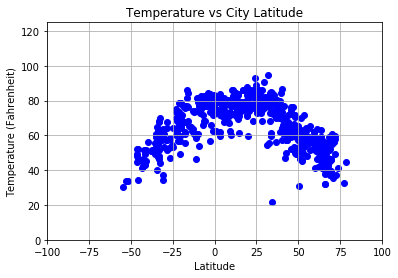

In [5]:
plt.scatter(weather_df["latitude"], weather_df["temperature"], color="blue")

plt.title("Temperature vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(0, 125)

### % Humidity vs Latitude

(0, 110)

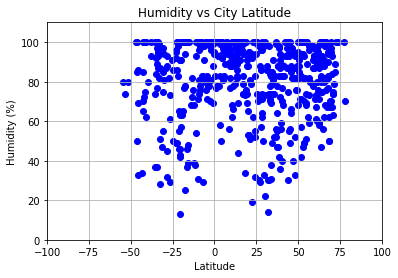

In [6]:
plt.scatter(weather_df["latitude"], weather_df["humidity"], color="blue")

plt.title("Humidity vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(0, 110)

### % Cloudiness vs Latitude

(-10, 110)

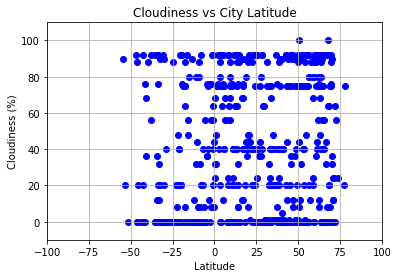

In [7]:
plt.scatter(weather_df["latitude"], weather_df["cloudiness"], color="blue")

plt.title("Cloudiness vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(-10, 110)

### Wind Speed vs Latitude

(-5, 50)

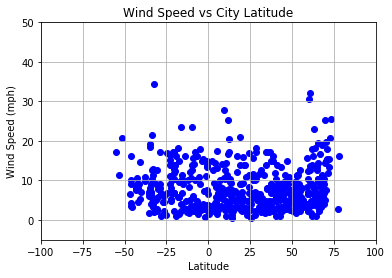

In [12]:
plt.scatter(weather_df["latitude"], weather_df["wind speed"], color="blue")

plt.title("Wind Speed vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(-5, 50)